# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#train image data
train_df = "/content/drive/MyDrive/AI & ML/week 5/FruitinAmazon/test"

#test image data
test_df = "/content/drive/MyDrive/AI & ML/week 5/FruitinAmazon/test"

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [ ]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [ ]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                   5
cupuacu                                5
graviola                               5
guarana                                5
pupunha                                5
tucuma                                 5


In [ ]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

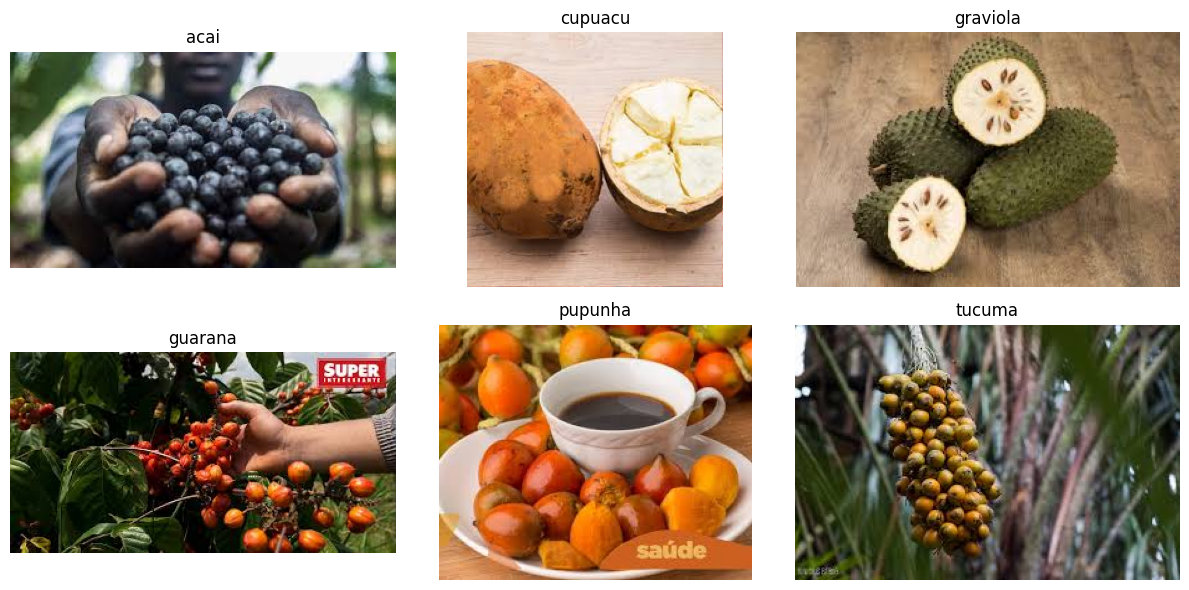

In [ ]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [ ]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 30 files belonging to 6 classes.
Using 24 files for training.
Found 30 files belonging to 6 classes.
Using 6 files for validation.


In [ ]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1250 - loss: 34.0956

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 34.0956 - val_accuracy: 0.0000e+00 - val_loss: 977.6362
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.2083 - loss: 894.1582

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.2083 - loss: 894.1582 - val_accuracy: 0.0000e+00 - val_loss: 377.1605
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.2083 - loss: 335.8247

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.2083 - loss: 335.8247 - val_accuracy: 0.1667 - val_loss: 169.9305
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2083 - loss: 179.5019

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2083 - loss: 179.5019 - val_accuracy: 0.0000e+00 - val_loss: 137.8567
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.2083 - loss: 150.6329

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2083 - loss: 150.6329 - val_accuracy: 0.0000e+00 - val_loss: 64.0401
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2083 - loss: 72.1955

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2083 - loss: 72.1955 - val_accuracy: 0.3333 - val_loss: 30.8566
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1250 - loss: 36.8417

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step - accuracy: 0.1250 - loss: 36.8417 - val_accuracy: 0.5000 - val_loss: 16.2457
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.3750 - loss: 18.5034

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step - accuracy: 0.3750 - loss: 18.5034 - val_accuracy: 0.3333 - val_loss: 10.1387
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.3333 - loss: 8.5647

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - accuracy: 0.3333 - loss: 8.5647 - val_accuracy: 0.5000 - val_loss: 5.9714
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3750 - loss: 4.1620

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 4.1620 - val_accuracy: 0.1667 - val_loss: 4.8390
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5417 - loss: 2.7935

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5417 - loss: 2.7935 - val_accuracy: 0.1667 - val_loss: 3.9271
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.6250 - loss: 0.8792

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.8792 - val_accuracy: 0.0000e+00 - val_loss: 3.1360
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.7500 - loss: 0.5075

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5075 - val_accuracy: 0.1667 - val_loss: 2.8737
Epoch 14/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9583 - loss: 0.1713

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - accuracy: 0.9583 - loss: 0.1713 - val_accuracy: 0.0000e+00 - val_loss: 2.3316
Epoch 15/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 1.0000 - loss: 0.1132

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - accuracy: 1.0000 - loss: 0.1132 - val_accuracy: 0.1667 - val_loss: 2.1658
Epoch 16/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.9583 - loss: 0.0988

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - accuracy: 0.9583 - loss: 0.0988 - val_accuracy: 0.1667 - val_loss: 2.0252
Epoch 17/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0570 - val_accuracy: 0.3333 - val_loss: 2.2864
Epoch 18/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 0.1667 - val_loss: 2.4377
Epoch 19/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - accuracy: 1.0000 - loss: 0.0323 - val_accuracy: 0.1667 - val_loss: 2.4962
Epoch 20/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.1667 - val_loss: 2.6092
Epoch 21/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.3333 - val_loss: 2.8131
Epoch 22/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - accuracy: 1.0000 - loss: 8.2761e-04 - val_accuracy: 0.5000 - val_loss: 3.0213
Epoch 23/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 1.0000 - loss: 1.6068e-04 - val_accuracy: 0.3333 - val_

In [ ]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.1667 - loss: 2.0252
Test Accuracy: 0.1667
Test Loss: 2.0252


In [ ]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    # Get unique classes from predictions and true labels
    unique_classes = sorted(list(set(y_true + y_pred)))

    # Filter class_names to match unique_classes
    target_names = [class_names[i] for i in unique_classes]

    print(classification_report(y_true, y_pred, target_names=target_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         0
     cupuacu       0.00      0.00      0.00         2
    graviola       0.00      0.00      0.00         2
     guarana       0.00      0.00      0.00         1
     pupunha       0.50      1.00      0.67         1

    accuracy                           0.17         6
   macro avg       0.10      0.20      0.13         6
weighted avg       0.08      0.17      0.11         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [ ]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Get unique classes from predictions and true labels
unique_classes = sorted(list(set(y_true + y_pred)))

# Filter class_names to match unique_classes
target_names = [class_names[i] for i in unique_classes if i < len(class_names)] # Added a check to avoid index error

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, labels=unique_classes)) # Added labels argument

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.5833 - loss: 1.0647

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5833 - loss: 1.0647 - val_accuracy: 0.3333 - val_loss: 1.7588
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.6660 - val_accuracy: 0.3333 - val_loss: 1.7755
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.8984 - val_accuracy: 0.3333 - val_loss: 1.7885
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7917 - loss: 0.7049 - val_accuracy: 0.3333 - val_loss: 1.8028
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.7118 - val_accuracy: 0.3333 - val_loss: 1.8138
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7083 - loss: 0.8098 - val_accuracy: 0.3333 - val_loss: 1.8123
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9167 - loss: 0.4523 - val_accuracy: 0.3333 - val_loss: 1.8140
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9583 - loss: 0.3180 - val_accuracy: 0.3333 - val_loss: 1.8183
Epoch 9/50
1/1 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
unique_classes = sorted(list(set(y_true + y_pred))) #get unique classes
# Filter class_names to match unique_classes and avoid index error if unique_classes is longer
target_names = [class_names[i] for i in unique_classes if i < len(class_names)]
print(classification_report(y_true, y_pred, target_names=target_names, labels=unique_classes)) # Added labels argument

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1250 - loss: 10.0343 - val_accuracy: 0.3333 - val_loss: 3.9947
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2500 - loss: 10.4806 - val_accuracy: 0.3333 - val_loss: 4.0126
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4167 - loss: 9.4795 - val_accuracy: 0.3333 - val_loss: 4.0099
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2500 - loss: 7.3021

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2500 - loss: 7.3021 - val_accuracy: 0.3333 - val_loss: 3.9902
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2917 - loss: 6.9480 - val_accuracy: 0.3333 - val_loss: 4.0017
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2083 - loss: 6.7513 - val_accuracy: 0.3333 - val_loss: 4.0194
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 3.8997 - val_accuracy: 0.3333 - val_loss: 4.0291
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3333 - loss: 9.1387 - val_accuracy: 0.3333 - val_loss: 4.0596
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2500 - loss: 7.1059 - val_accuracy: 0.3333 - val_loss: 4.1344
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 3.9902
Transfer Learning Model Accuracy: 0.3333
Transfer Learning Model Loss: 3.9902

Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")


# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")

# Get unique classes from predictions and true labels
unique_classes = sorted(list(set(y_true + y_pred)))

# Filter class_names to match unique_classes and avoid index error
# Only include classes that are present in both predictions (y_pred) and true labels (y_true)
target_names = [class_names[i] for i in unique_classes if i < len(class_names)]

# Print the classification report, explicitly specifying the labels
print(classification_report(y_true, y_pred, target_names=target_names, labels=unique_classes))

Found 30 files belonging to 6 classes.
Using 24 files for training.
Found 30 files belonging to 6 classes.
Using 6 files for validation.


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_2 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.2083 - loss: 1.8202

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.2083 - loss: 1.8202 - val_accuracy: 0.3333 - val_loss: 1.7616
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - accuracy: 0.2083 - loss: 1.8235 - val_accuracy: 0.3333 - val_loss: 1.7722
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.1667 - loss: 1.9750 - val_accuracy: 0.0000e+00 - val_loss: 1.7828
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.1667 - loss: 1.9612 - val_accuracy: 0.0000e+00 - val_loss: 1.7928
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.2500 - loss: 1.7251 - val_accuracy: 0.0000e+00 - val_loss: 1.8026
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.1250 - loss: 1.9912 - val_accuracy: 0.0000e+00 - val_loss: 1.8127
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.7616

Transfer Learning Model Accuracy: 0.3333
Transfer Learning Model Loss: 1.7616

Classification Report:
              precision    recall  f1-score   support

        acai     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_